# POC1
---

In [8]:
import pandas as pd 
import numpy as np 
from src.modeling.model_pipline import ModelPipline 
from src.modeling.model_xgb import XGBoost 
import xgboost as xgb 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle 
from sklearn.preprocessing import StandardScaler
from src.utils.metrics import evaluate, evaluate_sk
import warnings 
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("./data/processed/train.csv")
df = df.sort_values(by="disease", ascending=False).loc[:df.shape[0]/2, :]
x, y = df.drop("disease", axis=1), df[["disease"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)
print(x_train.shape[0], x_test.shape[0])

4298 1075


In [20]:
pip = ModelPipline(model_type="classifier")
pip.predict(x_train, y_train, x_test, y_test)

[18:59:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[19:00:34] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68467	eval-logloss:0.68890
[1]	train-logloss:0.67743	eval-logloss:0.68433
[2]	train-logloss:0.67192	eval-logloss:0.68156
[3]	train-logloss:0.66595	eval-logloss:0.67933
[4]	train-logloss:0.66063	eval-logloss:0.67604
[5]	train-logloss:0.65702	eval-logloss:0.67478
[6]	train-logloss:0.65244	eval-logloss:0.67384
[7]	train-logloss:0.64838	eval-logloss:0.67395
[8]	train-logloss:0.64500	eval-logloss:0.67325
[9]	train-logloss:0.64109	eval-logloss:0.67164
[10]	train-logloss:0.63715	eval-logloss:0.67188
[11]	train-logloss:0.63409	eval-logloss:0.67121
[12]	train-logloss:0.63101	eval-logloss:0.67111
[13]	train-logloss:0.62850	eval-logloss:0.67041
[14]	train

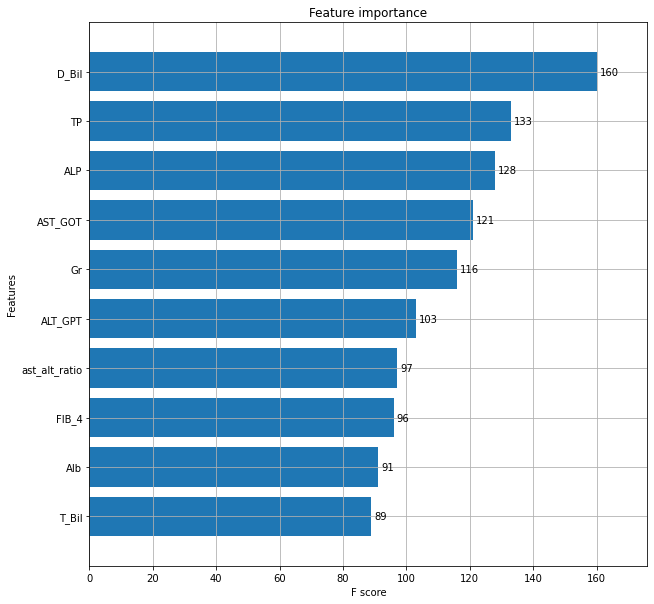

In [21]:
gbo = XGBoost()
model = gbo.fit(x_train, y_train, x_test, y_test)
gbo.show_feature_impotrance()

▲randomforest　normal

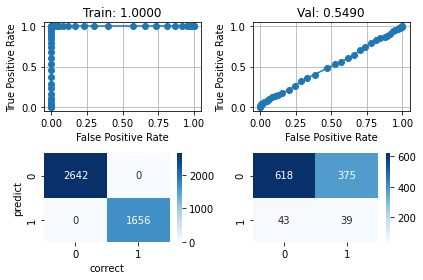

In [22]:
rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)
evaluate_sk(rf, x_train, x_test, y_train, y_test)

●XGBoost sklearn normal

[19:10:45] WARNING: ../src/learner.cc:573: 
Parameters: { "eval_set" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:10:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


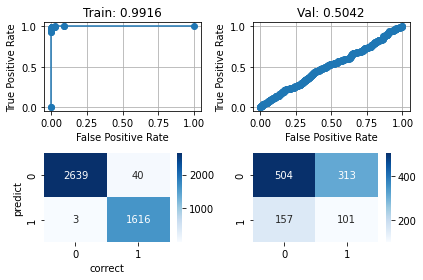

In [35]:
gb = xgb.XGBClassifier(eval_set=[(x_train, y_train), (x_test, y_test)],
                       random_state=0).fit(x_train, y_train)
evaluate_sk(gb, x_train, x_test, y_train, y_test)

In [25]:
gbo = XGBoost()
model = gbo.fit(x_train, y_train, x_test, y_test)

[19:02:39] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68467	eval-logloss:0.68890
[1]	train-logloss:0.67743	eval-logloss:0.68433
[2]	train-logloss:0.67192	eval-logloss:0.68156
[3]	train-logloss:0.66595	eval-logloss:0.67933
[4]	train-logloss:0.66063	eval-logloss:0.67604
[5]	train-logloss:0.65702	eval-logloss:0.67478
[6]	train-logloss:0.65244	eval-logloss:0.67384
[7]	train-logloss:0.64838	eval-logloss:0.67395
[8]	train-logloss:0.64500	eval-logloss:0.67325
[9]	train-logloss:0.64109	eval-logloss:0.67164
[10]	train-logloss:0.63715	eval-logloss:0.67188
[11]	train-logloss:0.63409	eval-logloss:0.67121
[12]	train-logloss:0.63101	eval-logloss:0.67111
[13]	train-logloss:0.62850	eval-logloss:0.67041
[14]	train

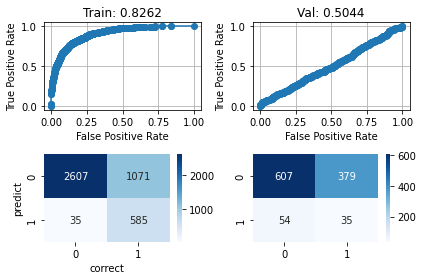

In [26]:
evaluate(model, x_train, x_test, y_train, y_test)

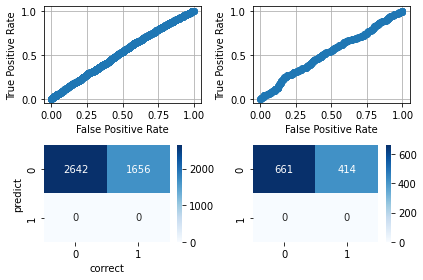

In [27]:
s = StandardScaler()
x_train_s = s.fit_transform(x_train)
x_test_s = s.transform(x_test)
log = LogisticRegression(random_state=0).fit(x_train_s, y_train)
evaluate_sk(log, x_train_s, x_test_s, y_train, y_test,  False)

[I 2021-09-06 19:06:18,231] A new study created in memory with name: no-name-253afb26-cca4-4e73-a306-007c06ef1720


[19:06:18] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69242	eval-logloss:0.69275
[1]	train-logloss:0.69177	eval-logloss:0.69234
[2]	train-logloss:0.69122	eval-logloss:0.69197
[3]	train-logloss:0.69065	eval-logloss:0.69157
[4]	train-logloss:0.68997	eval-logloss:0.69124
[5]	train-logloss:0.68948	eval-logloss:0.69088
[6]	train-logloss:0.68884	eval-logloss:0.69047
[7]	train-logloss:0.68818	eval-logloss:0.69013
[8]	train-logloss:0.68764	eval-logloss:0.68986
[9]	train-logloss:0.68703	eval-logloss:0.68940
[10]	train-logloss:0.68645	eval-logloss:0.68909
[11]	train-logloss:0.68573	eval-logloss:0.68883
[12]	train-logloss:0.68506	eval-logloss:0.68846
[13]	train-logloss:0.68442	eval-logloss:0.6880

[I 2021-09-06 19:06:19,608] Trial 0 finished with value: 0.6725281688778899 and parameters: {'max_depth': 6, 'colsample_bytree': 0.5190263017695164, 'min_sample_weight': 4.006483661964395, 'gamma': 0.00022859433522173892, 'subsample': 0.7449695777790677, 'alpha': 0.0038333321561566623, 'eta': 0.007501954443620123, 'lambda': 1.7474751375465036}. Best is trial 0 with value: 0.6725281688778899.


[19:06:19] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69300	eval-logloss:0.69306
[1]	train-logloss:0.69285	eval-logloss:0.69298
[2]	train-logloss:0.69271	eval-logloss:0.69290
[3]	train-logloss:0.69260	eval-logloss:0.69285
[4]	train-logloss:0.69243	eval-logloss:0.69277
[5]	train-logloss:0.69231	eval-logloss:0.69269
[6]	train-logloss:0.69216	eval-logloss:0.69262
[7]	train-logloss:0.69201	eval-logloss:0.69254
[8]	train-logloss:0.69190	eval-logloss:0.69249
[9]	train-logloss:0.69177	eval-logloss:0.69241
[10]	train-logloss:0.69161	eval-logloss:0.69233
[11]	train-logloss:0.69146	eval-logloss:0.69227
[12]	train-logloss:0.69135	eval-logloss:0.69220
[13]	train-logloss:0.69121	eval-logloss:0.6921

[I 2021-09-06 19:06:20,679] Trial 1 finished with value: 0.6871094537335772 and parameters: {'max_depth': 9, 'colsample_bytree': 0.24179177243329464, 'min_sample_weight': 6.190490166774185, 'gamma': 0.0001702783205227671, 'subsample': 0.801994197228042, 'alpha': 0.05039489598671213, 'eta': 0.0013869861245357324, 'lambda': 4.072912667361452e-06}. Best is trial 0 with value: 0.6725281688778899.


[19:06:20] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69261	eval-logloss:0.69267
[1]	train-logloss:0.69208	eval-logloss:0.69223
[2]	train-logloss:0.69155	eval-logloss:0.69177
[3]	train-logloss:0.69103	eval-logloss:0.69133
[4]	train-logloss:0.69052	eval-logloss:0.69088
[5]	train-logloss:0.69003	eval-logloss:0.69046
[6]	train-logloss:0.68953	eval-logloss:0.69005
[7]	train-logloss:0.68905	eval-logloss:0.68966
[8]	train-logloss:0.68858	eval-logloss:0.68926
[9]	train-logloss:0.68811	eval-logloss:0.68887
[10]	train-logloss:0.68764	eval-logloss:0.68846
[11]	train-logloss:0.68720	eval-logloss:0.68806
[12]	train-logloss:0.68679	eval-logloss:0.68772
[13]	train-logloss:0.68635	eval-logloss:0.6873

[I 2021-09-06 19:06:21,811] Trial 2 finished with value: 0.6710081475002821 and parameters: {'max_depth': 3, 'colsample_bytree': 0.6801737161546002, 'min_sample_weight': 6.000075993611755, 'gamma': 0.09122149510449752, 'subsample': 0.9891371330641394, 'alpha': 0.015726578854179506, 'eta': 0.008374496868436816, 'lambda': 0.29087355177892615}. Best is trial 2 with value: 0.6710081475002821.


[19:06:21] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69293	eval-logloss:0.69298
[1]	train-logloss:0.69271	eval-logloss:0.69277
[2]	train-logloss:0.69251	eval-logloss:0.69260
[3]	train-logloss:0.69230	eval-logloss:0.69243
[4]	train-logloss:0.69210	eval-logloss:0.69225
[5]	train-logloss:0.69191	eval-logloss:0.69209
[6]	train-logloss:0.69170	eval-logloss:0.69188
[7]	train-logloss:0.69148	eval-logloss:0.69172
[8]	train-logloss:0.69129	eval-logloss:0.69156
[9]	train-logloss:0.69109	eval-logloss:0.69136
[10]	train-logloss:0.69090	eval-logloss:0.69120
[11]	train-logloss:0.69070	eval-logloss:0.69104
[12]	train-logloss:0.69051	eval-logloss:0.69088
[13]	train-logloss:0.69031	eval-logloss:0.6907

[I 2021-09-06 19:06:22,811] Trial 3 finished with value: 0.6799757650286652 and parameters: {'max_depth': 3, 'colsample_bytree': 0.436436456821403, 'min_sample_weight': 1.3910837820057878, 'gamma': 0.36087046265775286, 'subsample': 0.7832901189773454, 'alpha': 0.00045566719139214756, 'eta': 0.0033815142678202898, 'lambda': 0.2628063327422689}. Best is trial 2 with value: 0.6710081475002821.


[19:06:22] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68588	eval-logloss:0.68953
[1]	train-logloss:0.67927	eval-logloss:0.68569
[2]	train-logloss:0.67365	eval-logloss:0.68273
[3]	train-logloss:0.66896	eval-logloss:0.67960
[4]	train-logloss:0.66446	eval-logloss:0.67774
[5]	train-logloss:0.66068	eval-logloss:0.67613
[6]	train-logloss:0.65590	eval-logloss:0.67484
[7]	train-logloss:0.65189	eval-logloss:0.67368
[8]	train-logloss:0.64834	eval-logloss:0.67244
[9]	train-logloss:0.64404	eval-logloss:0.67121
[10]	train-logloss:0.63967	eval-logloss:0.67067
[11]	train-logloss:0.63595	eval-logloss:0.67002
[12]	train-logloss:0.63356	eval-logloss:0.66941
[13]	train-logloss:0.62999	eval-logloss:0.6690

[I 2021-09-06 19:06:23,598] Trial 4 finished with value: 0.6662468387637027 and parameters: {'max_depth': 6, 'colsample_bytree': 0.3701978983307309, 'min_sample_weight': 1.0442146944938344, 'gamma': 0.0008731401853192552, 'subsample': 0.8202456221234389, 'alpha': 0.002935864364395358, 'eta': 0.07717846862118066, 'lambda': 0.05925733197263172}. Best is trial 4 with value: 0.6662468387637027.


[19:06:23] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69295	eval-logloss:0.69300
[1]	train-logloss:0.69275	eval-logloss:0.69286
[2]	train-logloss:0.69256	eval-logloss:0.69272
[3]	train-logloss:0.69238	eval-logloss:0.69258
[4]	train-logloss:0.69218	eval-logloss:0.69244
[5]	train-logloss:0.69201	eval-logloss:0.69230
[6]	train-logloss:0.69181	eval-logloss:0.69218
[7]	train-logloss:0.69162	eval-logloss:0.69203
[8]	train-logloss:0.69145	eval-logloss:0.69192
[9]	train-logloss:0.69124	eval-logloss:0.69176
[10]	train-logloss:0.69106	eval-logloss:0.69164
[11]	train-logloss:0.69085	eval-logloss:0.69151
[12]	train-logloss:0.69069	eval-logloss:0.69139
[13]	train-logloss:0.69050	eval-logloss:0.6912

[I 2021-09-06 19:06:24,618] Trial 5 finished with value: 0.6826009145448374 and parameters: {'max_depth': 5, 'colsample_bytree': 0.27354699847778985, 'min_sample_weight': 4.984610132094825, 'gamma': 3.0325206929428826e-08, 'subsample': 0.8434757721213031, 'alpha': 0.004814503186400559, 'eta': 0.0026349059741156123, 'lambda': 7.988846628849496e-06}. Best is trial 4 with value: 0.6662468387637027.


[19:06:24] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69296	eval-logloss:0.69300
[1]	train-logloss:0.69276	eval-logloss:0.69286
[2]	train-logloss:0.69257	eval-logloss:0.69270
[3]	train-logloss:0.69237	eval-logloss:0.69259
[4]	train-logloss:0.69215	eval-logloss:0.69243
[5]	train-logloss:0.69198	eval-logloss:0.69232
[6]	train-logloss:0.69178	eval-logloss:0.69219
[7]	train-logloss:0.69158	eval-logloss:0.69206
[8]	train-logloss:0.69141	eval-logloss:0.69193
[9]	train-logloss:0.69121	eval-logloss:0.69180
[10]	train-logloss:0.69101	eval-logloss:0.69166
[11]	train-logloss:0.69081	eval-logloss:0.69154
[12]	train-logloss:0.69064	eval-logloss:0.69141
[13]	train-logloss:0.69045	eval-logloss:0.6913

[I 2021-09-06 19:06:25,623] Trial 6 finished with value: 0.6825066495496174 and parameters: {'max_depth': 5, 'colsample_bytree': 0.2310525526558111, 'min_sample_weight': 3.717036026537111, 'gamma': 3.227097654537013e-05, 'subsample': 0.9940786592269085, 'alpha': 2.559642090152664e-05, 'eta': 0.0026166974560854475, 'lambda': 1.3463768176041092e-05}. Best is trial 4 with value: 0.6662468387637027.


[19:06:25] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69145	eval-logloss:0.69222
[1]	train-logloss:0.68967	eval-logloss:0.69120
[2]	train-logloss:0.68847	eval-logloss:0.69035
[3]	train-logloss:0.68698	eval-logloss:0.68969
[4]	train-logloss:0.68519	eval-logloss:0.68879
[5]	train-logloss:0.68369	eval-logloss:0.68792
[6]	train-logloss:0.68183	eval-logloss:0.68727
[7]	train-logloss:0.68009	eval-logloss:0.68642
[8]	train-logloss:0.67884	eval-logloss:0.68561
[9]	train-logloss:0.67758	eval-logloss:0.68472
[10]	train-logloss:0.67665	eval-logloss:0.68413
[11]	train-logloss:0.67535	eval-logloss:0.68351
[12]	train-logloss:0.67412	eval-logloss:0.68275
[13]	train-logloss:0.67290	eval-logloss:0.6821

[I 2021-09-06 19:06:26,650] Trial 7 finished with value: 0.6675878375075585 and parameters: {'max_depth': 7, 'colsample_bytree': 0.17918085415441004, 'min_sample_weight': 2.926245594412443, 'gamma': 9.024117386429386e-07, 'subsample': 0.6507564086611658, 'alpha': 2.7637615125314248e-05, 'eta': 0.020542778286285958, 'lambda': 9.274289735409131e-06}. Best is trial 4 with value: 0.6662468387637027.


[19:06:26] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68732	eval-logloss:0.68845
[1]	train-logloss:0.68212	eval-logloss:0.68440
[2]	train-logloss:0.67809	eval-logloss:0.68117
[3]	train-logloss:0.67444	eval-logloss:0.67922
[4]	train-logloss:0.67092	eval-logloss:0.67730
[5]	train-logloss:0.66842	eval-logloss:0.67564
[6]	train-logloss:0.66553	eval-logloss:0.67426
[7]	train-logloss:0.66323	eval-logloss:0.67322
[8]	train-logloss:0.66124	eval-logloss:0.67235
[9]	train-logloss:0.65924	eval-logloss:0.67138
[10]	train-logloss:0.65714	eval-logloss:0.67084
[11]	train-logloss:0.65544	eval-logloss:0.67023
[12]	train-logloss:0.65409	eval-logloss:0.67017
[13]	train-logloss:0.65229	eval-logloss:0.6703

[I 2021-09-06 19:06:27,284] Trial 8 finished with value: 0.6683985350298327 and parameters: {'max_depth': 4, 'colsample_bytree': 0.23373576487028158, 'min_sample_weight': 6.622061805876721, 'gamma': 5.9815013672851e-08, 'subsample': 0.9205519034853793, 'alpha': 2.4232243900608922e-05, 'eta': 0.08972612866432514, 'lambda': 0.0019079123162228998}. Best is trial 4 with value: 0.6662468387637027.


[19:06:27] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69265	eval-logloss:0.69291
[1]	train-logloss:0.69227	eval-logloss:0.69268
[2]	train-logloss:0.69178	eval-logloss:0.69245
[3]	train-logloss:0.69137	eval-logloss:0.69232
[4]	train-logloss:0.69089	eval-logloss:0.69213
[5]	train-logloss:0.69054	eval-logloss:0.69199
[6]	train-logloss:0.69005	eval-logloss:0.69179
[7]	train-logloss:0.68963	eval-logloss:0.69158
[8]	train-logloss:0.68926	eval-logloss:0.69138
[9]	train-logloss:0.68892	eval-logloss:0.69115
[10]	train-logloss:0.68867	eval-logloss:0.69104
[11]	train-logloss:0.68827	eval-logloss:0.69088
[12]	train-logloss:0.68787	eval-logloss:0.69068
[13]	train-logloss:0.68749	eval-logloss:0.6904

[I 2021-09-06 19:06:28,675] Trial 9 finished with value: 0.6791353942072669 and parameters: {'max_depth': 9, 'colsample_bytree': 0.4025738117667017, 'min_sample_weight': 5.486098228809554, 'gamma': 2.0582699712570616e-08, 'subsample': 0.6932527825611472, 'alpha': 3.025423979924897e-05, 'eta': 0.003910933172251059, 'lambda': 6.7778824524680825e-06}. Best is trial 4 with value: 0.6662468387637027.


[19:06:28] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68850	eval-logloss:0.69024
[1]	train-logloss:0.68466	eval-logloss:0.68771
[2]	train-logloss:0.68207	eval-logloss:0.68555
[3]	train-logloss:0.67967	eval-logloss:0.68389
[4]	train-logloss:0.67667	eval-logloss:0.68230
[5]	train-logloss:0.67409	eval-logloss:0.68011
[6]	train-logloss:0.67158	eval-logloss:0.67898
[7]	train-logloss:0.66816	eval-logloss:0.67771
[8]	train-logloss:0.66619	eval-logloss:0.67666
[9]	train-logloss:0.66367	eval-logloss:0.67571
[10]	train-logloss:0.66117	eval-logloss:0.67509
[11]	train-logloss:0.65909	eval-logloss:0.67416
[12]	train-logloss:0.65666	eval-logloss:0.67325
[13]	train-logloss:0.65484	eval-logloss:0.6727

[I 2021-09-06 19:06:29,412] Trial 10 finished with value: 0.6695986128130624 and parameters: {'max_depth': 7, 'colsample_bytree': 0.12441262970928435, 'min_sample_weight': 1.0489839293581724, 'gamma': 0.006210557393778163, 'subsample': 0.6085573263571322, 'alpha': 0.00029574219389351484, 'eta': 0.055983996159057754, 'lambda': 0.00283455810411157}. Best is trial 4 with value: 0.6662468387637027.


[19:06:29] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69028	eval-logloss:0.69147
[1]	train-logloss:0.68749	eval-logloss:0.68980
[2]	train-logloss:0.68565	eval-logloss:0.68848
[3]	train-logloss:0.68328	eval-logloss:0.68739
[4]	train-logloss:0.68082	eval-logloss:0.68634
[5]	train-logloss:0.67853	eval-logloss:0.68509
[6]	train-logloss:0.67607	eval-logloss:0.68405
[7]	train-logloss:0.67339	eval-logloss:0.68293
[8]	train-logloss:0.67172	eval-logloss:0.68198
[9]	train-logloss:0.66975	eval-logloss:0.68074
[10]	train-logloss:0.66818	eval-logloss:0.68011
[11]	train-logloss:0.66658	eval-logloss:0.67963
[12]	train-logloss:0.66471	eval-logloss:0.67831
[13]	train-logloss:0.66283	eval-logloss:0.6775

[I 2021-09-06 19:06:30,345] Trial 11 finished with value: 0.6667573621661164 and parameters: {'max_depth': 7, 'colsample_bytree': 0.14486122652307631, 'min_sample_weight': 2.2525529142606064, 'gamma': 2.9919367080811604e-06, 'subsample': 0.6446669487642561, 'alpha': 0.00013533447461056372, 'eta': 0.03346188419806402, 'lambda': 0.0001872650657189224}. Best is trial 4 with value: 0.6662468387637027.


[19:06:30] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69065	eval-logloss:0.69156
[1]	train-logloss:0.68844	eval-logloss:0.69002
[2]	train-logloss:0.68684	eval-logloss:0.68868
[3]	train-logloss:0.68519	eval-logloss:0.68732
[4]	train-logloss:0.68334	eval-logloss:0.68635
[5]	train-logloss:0.68162	eval-logloss:0.68524
[6]	train-logloss:0.68004	eval-logloss:0.68401
[7]	train-logloss:0.67794	eval-logloss:0.68305
[8]	train-logloss:0.67663	eval-logloss:0.68213
[9]	train-logloss:0.67485	eval-logloss:0.68119
[10]	train-logloss:0.67297	eval-logloss:0.68061
[11]	train-logloss:0.67161	eval-logloss:0.67977
[12]	train-logloss:0.67013	eval-logloss:0.67909
[13]	train-logloss:0.66852	eval-logloss:0.6786

[I 2021-09-06 19:06:31,245] Trial 12 finished with value: 0.6679783385576203 and parameters: {'max_depth': 7, 'colsample_bytree': 0.10129705704232106, 'min_sample_weight': 2.019174588485813, 'gamma': 4.907203727272342e-06, 'subsample': 0.7098473342340672, 'alpha': 0.00020823905264252623, 'eta': 0.03034010076367752, 'lambda': 0.0006411962931433747}. Best is trial 4 with value: 0.6662468387637027.


[19:06:31] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69014	eval-logloss:0.69163
[1]	train-logloss:0.68776	eval-logloss:0.69019
[2]	train-logloss:0.68521	eval-logloss:0.68889
[3]	train-logloss:0.68276	eval-logloss:0.68761
[4]	train-logloss:0.68049	eval-logloss:0.68636
[5]	train-logloss:0.67847	eval-logloss:0.68534
[6]	train-logloss:0.67610	eval-logloss:0.68449
[7]	train-logloss:0.67391	eval-logloss:0.68346
[8]	train-logloss:0.67125	eval-logloss:0.68268
[9]	train-logloss:0.66903	eval-logloss:0.68176
[10]	train-logloss:0.66613	eval-logloss:0.68155
[11]	train-logloss:0.66427	eval-logloss:0.68072
[12]	train-logloss:0.66242	eval-logloss:0.67985
[13]	train-logloss:0.66008	eval-logloss:0.6789

[I 2021-09-06 19:06:32,845] Trial 13 finished with value: 0.6699360232020534 and parameters: {'max_depth': 8, 'colsample_bytree': 0.917027678218495, 'min_sample_weight': 9.58480207351303, 'gamma': 0.003717693991030642, 'subsample': 0.8650937207971385, 'alpha': 0.0014167519640805024, 'eta': 0.027496051840665784, 'lambda': 0.03316278360443766}. Best is trial 4 with value: 0.6662468387637027.


[19:06:32] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68644	eval-logloss:0.68966
[1]	train-logloss:0.68085	eval-logloss:0.68563
[2]	train-logloss:0.67707	eval-logloss:0.68324
[3]	train-logloss:0.67264	eval-logloss:0.68160
[4]	train-logloss:0.66764	eval-logloss:0.67942
[5]	train-logloss:0.66418	eval-logloss:0.67795
[6]	train-logloss:0.66068	eval-logloss:0.67709
[7]	train-logloss:0.65647	eval-logloss:0.67492
[8]	train-logloss:0.65397	eval-logloss:0.67404
[9]	train-logloss:0.65080	eval-logloss:0.67257
[10]	train-logloss:0.64866	eval-logloss:0.67279
[11]	train-logloss:0.64502	eval-logloss:0.67278
[12]	train-logloss:0.64292	eval-logloss:0.67188
[13]	train-logloss:0.64018	eval-logloss:0.6721

[I 2021-09-06 19:06:33,423] Trial 14 finished with value: 0.6693767386536266 and parameters: {'max_depth': 6, 'colsample_bytree': 0.15282313683725027, 'min_sample_weight': 2.1554044534170282, 'gamma': 1.2679393633014928e-06, 'subsample': 0.6159744862348164, 'alpha': 8.751875331604414e-05, 'eta': 0.08863953308735271, 'lambda': 0.00013012142927382425}. Best is trial 4 with value: 0.6662468387637027.


[19:06:33] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68719	eval-logloss:0.69097
[1]	train-logloss:0.68209	eval-logloss:0.68882
[2]	train-logloss:0.67659	eval-logloss:0.68699
[3]	train-logloss:0.67226	eval-logloss:0.68541
[4]	train-logloss:0.66764	eval-logloss:0.68350
[5]	train-logloss:0.66451	eval-logloss:0.68193
[6]	train-logloss:0.65972	eval-logloss:0.68106
[7]	train-logloss:0.65390	eval-logloss:0.67921
[8]	train-logloss:0.65069	eval-logloss:0.67798
[9]	train-logloss:0.64750	eval-logloss:0.67713
[10]	train-logloss:0.64416	eval-logloss:0.67598
[11]	train-logloss:0.64082	eval-logloss:0.67512
[12]	train-logloss:0.63837	eval-logloss:0.67441
[13]	train-logloss:0.63436	eval-logloss:0.6735

[I 2021-09-06 19:06:34,530] Trial 15 finished with value: 0.6684555246525032 and parameters: {'max_depth': 8, 'colsample_bytree': 0.3523745019813991, 'min_sample_weight': 1.0001845872036021, 'gamma': 0.0038623814498898535, 'subsample': 0.6830175030885616, 'alpha': 0.0013327251966824116, 'eta': 0.046910623813498635, 'lambda': 0.030356955639575883}. Best is trial 4 with value: 0.6662468387637027.


[19:06:34] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69168	eval-logloss:0.69233
[1]	train-logloss:0.69036	eval-logloss:0.69130
[2]	train-logloss:0.68920	eval-logloss:0.69060
[3]	train-logloss:0.68804	eval-logloss:0.68982
[4]	train-logloss:0.68693	eval-logloss:0.68905
[5]	train-logloss:0.68599	eval-logloss:0.68832
[6]	train-logloss:0.68475	eval-logloss:0.68752
[7]	train-logloss:0.68362	eval-logloss:0.68690
[8]	train-logloss:0.68264	eval-logloss:0.68639
[9]	train-logloss:0.68141	eval-logloss:0.68546
[10]	train-logloss:0.68051	eval-logloss:0.68485
[11]	train-logloss:0.67926	eval-logloss:0.68437
[12]	train-logloss:0.67810	eval-logloss:0.68354
[13]	train-logloss:0.67693	eval-logloss:0.6829

[I 2021-09-06 19:06:35,635] Trial 16 finished with value: 0.6683457560594692 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5812060401189872, 'min_sample_weight': 1.672997763076727, 'gamma': 1.9744524791248065e-05, 'subsample': 0.7464638514311023, 'alpha': 9.952057706634409e-05, 'eta': 0.01688680957618457, 'lambda': 0.00011694958703324834}. Best is trial 4 with value: 0.6662468387637027.


[19:06:35] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68887	eval-logloss:0.69070
[1]	train-logloss:0.68418	eval-logloss:0.68876
[2]	train-logloss:0.68143	eval-logloss:0.68699
[3]	train-logloss:0.67775	eval-logloss:0.68519
[4]	train-logloss:0.67404	eval-logloss:0.68345
[5]	train-logloss:0.67078	eval-logloss:0.68259
[6]	train-logloss:0.66662	eval-logloss:0.68128
[7]	train-logloss:0.66309	eval-logloss:0.67983
[8]	train-logloss:0.66033	eval-logloss:0.67928
[9]	train-logloss:0.65739	eval-logloss:0.67804
[10]	train-logloss:0.65426	eval-logloss:0.67736
[11]	train-logloss:0.65104	eval-logloss:0.67671
[12]	train-logloss:0.64930	eval-logloss:0.67609
[13]	train-logloss:0.64675	eval-logloss:0.6755

[I 2021-09-06 19:06:36,323] Trial 17 finished with value: 0.6711030847804491 and parameters: {'max_depth': 8, 'colsample_bytree': 0.17626889893460437, 'min_sample_weight': 2.8433993452003365, 'gamma': 4.128418936724565e-07, 'subsample': 0.8352395521971028, 'alpha': 0.004307577940958288, 'eta': 0.04877876020767305, 'lambda': 0.016241084895106707}. Best is trial 4 with value: 0.6662468387637027.


[19:06:36] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69190	eval-logloss:0.69238
[1]	train-logloss:0.69072	eval-logloss:0.69163
[2]	train-logloss:0.68964	eval-logloss:0.69097
[3]	train-logloss:0.68878	eval-logloss:0.69040
[4]	train-logloss:0.68770	eval-logloss:0.68973
[5]	train-logloss:0.68675	eval-logloss:0.68916
[6]	train-logloss:0.68557	eval-logloss:0.68853
[7]	train-logloss:0.68437	eval-logloss:0.68792
[8]	train-logloss:0.68346	eval-logloss:0.68734
[9]	train-logloss:0.68243	eval-logloss:0.68669
[10]	train-logloss:0.68132	eval-logloss:0.68619
[11]	train-logloss:0.68029	eval-logloss:0.68569
[12]	train-logloss:0.67938	eval-logloss:0.68514
[13]	train-logloss:0.67842	eval-logloss:0.6847

[I 2021-09-06 19:06:37,372] Trial 18 finished with value: 0.6689332687577536 and parameters: {'max_depth': 6, 'colsample_bytree': 0.27958089182261325, 'min_sample_weight': 1.3648034184823015, 'gamma': 0.0002549075579000855, 'subsample': 0.9057753650047844, 'alpha': 0.09263461787560899, 'eta': 0.013668572102862823, 'lambda': 6.675850471156508e-05}. Best is trial 4 with value: 0.6662468387637027.


[19:06:37] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69092	eval-logloss:0.69159
[1]	train-logloss:0.68889	eval-logloss:0.69002
[2]	train-logloss:0.68737	eval-logloss:0.68877
[3]	train-logloss:0.68596	eval-logloss:0.68749
[4]	train-logloss:0.68407	eval-logloss:0.68653
[5]	train-logloss:0.68245	eval-logloss:0.68550
[6]	train-logloss:0.68058	eval-logloss:0.68466
[7]	train-logloss:0.67889	eval-logloss:0.68362
[8]	train-logloss:0.67781	eval-logloss:0.68282
[9]	train-logloss:0.67631	eval-logloss:0.68182
[10]	train-logloss:0.67467	eval-logloss:0.68123
[11]	train-logloss:0.67338	eval-logloss:0.68039
[12]	train-logloss:0.67195	eval-logloss:0.67964
[13]	train-logloss:0.67059	eval-logloss:0.6789

[I 2021-09-06 19:06:38,200] Trial 19 finished with value: 0.668103778334551 and parameters: {'max_depth': 6, 'colsample_bytree': 0.12913816250621082, 'min_sample_weight': 2.2010492432295425, 'gamma': 0.030146745454010474, 'subsample': 0.7395489487293088, 'alpha': 1.0501491374886018e-05, 'eta': 0.029191412719171167, 'lambda': 3.895549895740214}. Best is trial 4 with value: 0.6662468387637027.


[19:06:38] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68858	eval-logloss:0.68936
[1]	train-logloss:0.68480	eval-logloss:0.68664
[2]	train-logloss:0.68151	eval-logloss:0.68435
[3]	train-logloss:0.67875	eval-logloss:0.68246
[4]	train-logloss:0.67595	eval-logloss:0.68054
[5]	train-logloss:0.67363	eval-logloss:0.67867
[6]	train-logloss:0.67112	eval-logloss:0.67705
[7]	train-logloss:0.66859	eval-logloss:0.67588
[8]	train-logloss:0.66645	eval-logloss:0.67499
[9]	train-logloss:0.66426	eval-logloss:0.67364
[10]	train-logloss:0.66284	eval-logloss:0.67289
[11]	train-logloss:0.66081	eval-logloss:0.67182
[12]	train-logloss:0.65893	eval-logloss:0.67119
[13]	train-logloss:0.65753	eval-logloss:0.6702

[I 2021-09-06 19:06:38,761] Trial 20 finished with value: 0.6666547710673754 and parameters: {'max_depth': 4, 'colsample_bytree': 0.3331797853441711, 'min_sample_weight': 1.3218421615667801, 'gamma': 0.0007546794293903341, 'subsample': 0.6515125484882722, 'alpha': 0.0007362695233221069, 'eta': 0.06343175614673424, 'lambda': 0.1255458042686441}. Best is trial 4 with value: 0.6662468387637027.


[19:06:38] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68787	eval-logloss:0.68877
[1]	train-logloss:0.68370	eval-logloss:0.68567
[2]	train-logloss:0.68012	eval-logloss:0.68309
[3]	train-logloss:0.67701	eval-logloss:0.68087
[4]	train-logloss:0.67394	eval-logloss:0.67885
[5]	train-logloss:0.67145	eval-logloss:0.67699
[6]	train-logloss:0.66875	eval-logloss:0.67548
[7]	train-logloss:0.66612	eval-logloss:0.67432
[8]	train-logloss:0.66387	eval-logloss:0.67340
[9]	train-logloss:0.66156	eval-logloss:0.67207
[10]	train-logloss:0.66000	eval-logloss:0.67144
[11]	train-logloss:0.65778	eval-logloss:0.67042
[12]	train-logloss:0.65576	eval-logloss:0.67004
[13]	train-logloss:0.65408	eval-logloss:0.6691

[I 2021-09-06 19:06:39,367] Trial 21 finished with value: 0.6659078168591788 and parameters: {'max_depth': 4, 'colsample_bytree': 0.3487064371184554, 'min_sample_weight': 1.3114051624121286, 'gamma': 0.0011338609672762344, 'subsample': 0.6477550811513132, 'alpha': 0.0005676677736618833, 'eta': 0.07345888427779136, 'lambda': 0.12016475407017232}. Best is trial 21 with value: 0.6659078168591788.


[19:06:39] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68824	eval-logloss:0.68912
[1]	train-logloss:0.68418	eval-logloss:0.68609
[2]	train-logloss:0.68071	eval-logloss:0.68354
[3]	train-logloss:0.67783	eval-logloss:0.68161
[4]	train-logloss:0.67483	eval-logloss:0.68000
[5]	train-logloss:0.67246	eval-logloss:0.67807
[6]	train-logloss:0.66990	eval-logloss:0.67661
[7]	train-logloss:0.66729	eval-logloss:0.67550
[8]	train-logloss:0.66541	eval-logloss:0.67446
[9]	train-logloss:0.66317	eval-logloss:0.67311
[10]	train-logloss:0.66160	eval-logloss:0.67214
[11]	train-logloss:0.65951	eval-logloss:0.67141
[12]	train-logloss:0.65785	eval-logloss:0.67055
[13]	train-logloss:0.65628	eval-logloss:0.6698

[I 2021-09-06 19:06:40,086] Trial 22 finished with value: 0.6663915364409602 and parameters: {'max_depth': 4, 'colsample_bytree': 0.34746773104465306, 'min_sample_weight': 1.2704345265414283, 'gamma': 0.0013597889618672165, 'subsample': 0.6538126970484691, 'alpha': 0.0008503148937629188, 'eta': 0.06855360935642565, 'lambda': 0.18183298048357788}. Best is trial 21 with value: 0.6659078168591788.


[19:06:40] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68662	eval-logloss:0.68825
[1]	train-logloss:0.68128	eval-logloss:0.68394
[2]	train-logloss:0.67745	eval-logloss:0.68169
[3]	train-logloss:0.67372	eval-logloss:0.67946
[4]	train-logloss:0.67025	eval-logloss:0.67718
[5]	train-logloss:0.66699	eval-logloss:0.67588
[6]	train-logloss:0.66399	eval-logloss:0.67474
[7]	train-logloss:0.66089	eval-logloss:0.67391
[8]	train-logloss:0.65846	eval-logloss:0.67308
[9]	train-logloss:0.65594	eval-logloss:0.67201
[10]	train-logloss:0.65334	eval-logloss:0.67137
[11]	train-logloss:0.65121	eval-logloss:0.67099
[12]	train-logloss:0.64900	eval-logloss:0.67040
[13]	train-logloss:0.64698	eval-logloss:0.6694

[I 2021-09-06 19:06:40,852] Trial 23 finished with value: 0.666610735072646 and parameters: {'max_depth': 4, 'colsample_bytree': 0.43603325519064184, 'min_sample_weight': 1.1896756809322813, 'gamma': 0.0012415017733798017, 'subsample': 0.6715411182368868, 'alpha': 0.0023910664053442172, 'eta': 0.09376063362993638, 'lambda': 0.7592368980323448}. Best is trial 21 with value: 0.6659078168591788.


[19:06:40] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68853	eval-logloss:0.68988
[1]	train-logloss:0.68448	eval-logloss:0.68656
[2]	train-logloss:0.68114	eval-logloss:0.68435
[3]	train-logloss:0.67822	eval-logloss:0.68233
[4]	train-logloss:0.67546	eval-logloss:0.68055
[5]	train-logloss:0.67315	eval-logloss:0.67935
[6]	train-logloss:0.67066	eval-logloss:0.67796
[7]	train-logloss:0.66791	eval-logloss:0.67646
[8]	train-logloss:0.66607	eval-logloss:0.67578
[9]	train-logloss:0.66358	eval-logloss:0.67427
[10]	train-logloss:0.66183	eval-logloss:0.67359
[11]	train-logloss:0.65985	eval-logloss:0.67304
[12]	train-logloss:0.65812	eval-logloss:0.67249
[13]	train-logloss:0.65595	eval-logloss:0.6708

[I 2021-09-06 19:06:41,571] Trial 24 finished with value: 0.6667761004525562 and parameters: {'max_depth': 4, 'colsample_bytree': 0.5283846677331134, 'min_sample_weight': 1.6785610683522312, 'gamma': 0.0199351344207763, 'subsample': 0.7174544739755123, 'alpha': 0.01515547373253855, 'eta': 0.06473798852880398, 'lambda': 8.566432295478798}. Best is trial 21 with value: 0.6659078168591788.


[19:06:41] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69039	eval-logloss:0.69092
[1]	train-logloss:0.68806	eval-logloss:0.68888
[2]	train-logloss:0.68601	eval-logloss:0.68716
[3]	train-logloss:0.68421	eval-logloss:0.68565
[4]	train-logloss:0.68233	eval-logloss:0.68407
[5]	train-logloss:0.68076	eval-logloss:0.68259
[6]	train-logloss:0.67904	eval-logloss:0.68141
[7]	train-logloss:0.67737	eval-logloss:0.67999
[8]	train-logloss:0.67605	eval-logloss:0.67901
[9]	train-logloss:0.67476	eval-logloss:0.67760
[10]	train-logloss:0.67373	eval-logloss:0.67655
[11]	train-logloss:0.67232	eval-logloss:0.67549
[12]	train-logloss:0.67100	eval-logloss:0.67465
[13]	train-logloss:0.66996	eval-logloss:0.6738

[I 2021-09-06 19:06:42,232] Trial 25 finished with value: 0.6669347734783971 and parameters: {'max_depth': 3, 'colsample_bytree': 0.3545036609194226, 'min_sample_weight': 1.703485210822016, 'gamma': 0.0007978050743353054, 'subsample': 0.620229041087166, 'alpha': 0.0006971087305725843, 'eta': 0.0411452483027488, 'lambda': 0.015017005043373442}. Best is trial 21 with value: 0.6659078168591788.


[19:06:42] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68737	eval-logloss:0.68959
[1]	train-logloss:0.68245	eval-logloss:0.68580
[2]	train-logloss:0.67844	eval-logloss:0.68345
[3]	train-logloss:0.67438	eval-logloss:0.68202
[4]	train-logloss:0.67017	eval-logloss:0.67931
[5]	train-logloss:0.66795	eval-logloss:0.67775
[6]	train-logloss:0.66420	eval-logloss:0.67566
[7]	train-logloss:0.66100	eval-logloss:0.67475
[8]	train-logloss:0.65832	eval-logloss:0.67427
[9]	train-logloss:0.65552	eval-logloss:0.67264
[10]	train-logloss:0.65250	eval-logloss:0.67106
[11]	train-logloss:0.64953	eval-logloss:0.67081
[12]	train-logloss:0.64709	eval-logloss:0.66982
[13]	train-logloss:0.64420	eval-logloss:0.6687

[I 2021-09-06 19:06:43,057] Trial 26 finished with value: 0.6657249935283217 and parameters: {'max_depth': 5, 'colsample_bytree': 0.6819732521460067, 'min_sample_weight': 1.1726131094565377, 'gamma': 4.8566704298465816e-05, 'subsample': 0.7792848524670019, 'alpha': 0.010566435413257766, 'eta': 0.06638807617874863, 'lambda': 0.07441309357803054}. Best is trial 26 with value: 0.6657249935283217.


[19:06:43] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68499	eval-logloss:0.68951
[1]	train-logloss:0.67756	eval-logloss:0.68531
[2]	train-logloss:0.67173	eval-logloss:0.68196
[3]	train-logloss:0.66668	eval-logloss:0.67979
[4]	train-logloss:0.66177	eval-logloss:0.67746
[5]	train-logloss:0.65780	eval-logloss:0.67667
[6]	train-logloss:0.65324	eval-logloss:0.67578
[7]	train-logloss:0.64905	eval-logloss:0.67553
[8]	train-logloss:0.64521	eval-logloss:0.67509
[9]	train-logloss:0.64131	eval-logloss:0.67521
[10]	train-logloss:0.63678	eval-logloss:0.67518
[11]	train-logloss:0.63370	eval-logloss:0.67494
[12]	train-logloss:0.63101	eval-logloss:0.67405
[13]	train-logloss:0.62821	eval-logloss:0.6734

[I 2021-09-06 19:06:43,851] Trial 27 finished with value: 0.673217403140179 and parameters: {'max_depth': 5, 'colsample_bytree': 0.9587495364034556, 'min_sample_weight': 1.1088879292881628, 'gamma': 4.001955367508336e-05, 'subsample': 0.7966834858744375, 'alpha': 0.012987006358498802, 'eta': 0.09959062807778532, 'lambda': 0.053975837603784216}. Best is trial 26 with value: 0.6657249935283217.


[19:06:43] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69205	eval-logloss:0.69241
[1]	train-logloss:0.69100	eval-logloss:0.69176
[2]	train-logloss:0.69002	eval-logloss:0.69113
[3]	train-logloss:0.68906	eval-logloss:0.69055
[4]	train-logloss:0.68806	eval-logloss:0.68984
[5]	train-logloss:0.68731	eval-logloss:0.68933
[6]	train-logloss:0.68631	eval-logloss:0.68871
[7]	train-logloss:0.68543	eval-logloss:0.68815
[8]	train-logloss:0.68463	eval-logloss:0.68775
[9]	train-logloss:0.68370	eval-logloss:0.68715
[10]	train-logloss:0.68282	eval-logloss:0.68668
[11]	train-logloss:0.68199	eval-logloss:0.68629
[12]	train-logloss:0.68123	eval-logloss:0.68593
[13]	train-logloss:0.68032	eval-logloss:0.6854

[I 2021-09-06 19:06:45,128] Trial 28 finished with value: 0.6702342234378638 and parameters: {'max_depth': 5, 'colsample_bytree': 0.7651075898124274, 'min_sample_weight': 1.5187612138564814, 'gamma': 1.0974891080830066e-05, 'subsample': 0.8194851308387513, 'alpha': 0.026622978347101287, 'eta': 0.012148663061001756, 'lambda': 0.009871824320797399}. Best is trial 26 with value: 0.6657249935283217.


[19:06:45] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69263	eval-logloss:0.69282
[1]	train-logloss:0.69215	eval-logloss:0.69246
[2]	train-logloss:0.69169	eval-logloss:0.69217
[3]	train-logloss:0.69125	eval-logloss:0.69188
[4]	train-logloss:0.69074	eval-logloss:0.69150
[5]	train-logloss:0.69037	eval-logloss:0.69119
[6]	train-logloss:0.68987	eval-logloss:0.69083
[7]	train-logloss:0.68934	eval-logloss:0.69052
[8]	train-logloss:0.68893	eval-logloss:0.69028
[9]	train-logloss:0.68847	eval-logloss:0.68993
[10]	train-logloss:0.68804	eval-logloss:0.68971
[11]	train-logloss:0.68757	eval-logloss:0.68947
[12]	train-logloss:0.68710	eval-logloss:0.68919
[13]	train-logloss:0.68661	eval-logloss:0.6888

[I 2021-09-06 19:06:46,295] Trial 29 finished with value: 0.6741452178289724 and parameters: {'max_depth': 5, 'colsample_bytree': 0.6485905561735524, 'min_sample_weight': 1.910427583852776, 'gamma': 8.642363819589444e-05, 'subsample': 0.7650225800548599, 'alpha': 0.00788944868852843, 'eta': 0.006044054978954577, 'lambda': 1.7206020417174364}. Best is trial 26 with value: 0.6657249935283217.


[19:06:46] WARNING: ../src/learner.cc:573: 
Parameters: { "eval_set", "min_sample_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:06:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


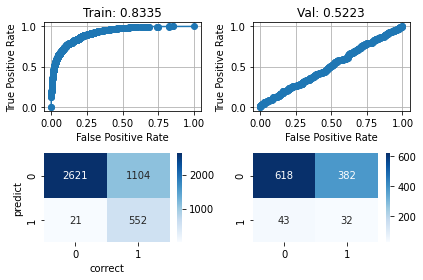

In [28]:
result = gbo.parameter_chunning()
model_ = xgb.XGBClassifier(**result["best_parameters"], 
                          eval_set=[(x_train, y_train), (x_test, y_test)], 
                          random_state=0).fit(x_train, y_train)

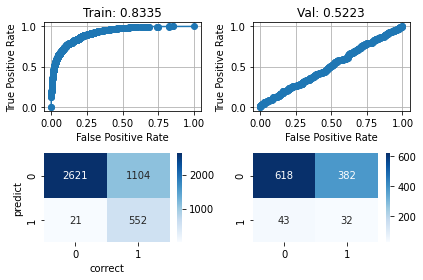

In [29]:
evaluate_sk(model_, x_train, x_test, y_train, y_test)

●Tree normal 

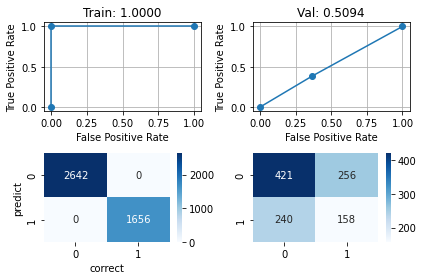

In [31]:
tr = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
evaluate_sk(tr, x_train, x_test, y_train, y_test)

In [32]:
param = {
    "max_depth": [1, 4, 6, 8, 10],
    "min_samples_leaf": [1, 4, 6, 7, 10], 
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param, cv=5).fit(x_train, y_train)

In [33]:
grid.best_params_, grid.best_score_

({'max_depth': 1, 'min_samples_leaf': 1}, 0.6147044968459812)

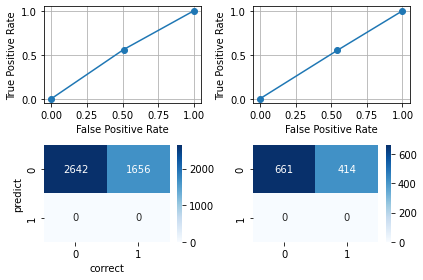

In [34]:
gr = grid.best_estimator_
evaluate_sk(gr.fit(x_train, y_train), x_train, x_test, y_train, y_test, False)

パラメータチューニングをすることですべてNegativeの予測をしてしまう。

# Submitions 
---

In [36]:
test = pd.read_csv("./data/raw/test.csv")
test["M_Bil"] = test.T_Bil - test.D_Bil
test["ast_alt_ratio"] = test.AST_GOT / test.ALT_GPT 
test["Gender"] = test.Gender.map({"Female": 1, "Male": 0})
test["Gr"] = test.Alb/test.AG_ratio 
test["FIB_4"] = (test.Age*test.AST_GOT)/(130000.0*np.sqrt(test.ALT_GPT))
test["FIB_4"] = test["FIB_4"].fillna(df["FIB_4"].mean())
test.drop("id", axis=1, inplace=True)
test = test[x.columns]
test.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,M_Bil,ast_alt_ratio,FIB_4,Gr
0,52,1,1.026581,13.407905,216.860278,28.177705,5.157074,6.851623,3.438121,1.052649,-12.381324,0.183020,0.000389,3.266161
1,14,1,0.859378,0.333124,176.529212,0.755860,5.038344,6.120051,2.807664,1.346133,0.526255,6.665714,0.000624,2.085725
2,10,0,0.821739,0.082650,189.614457,30.372275,820.126529,7.398297,4.133073,1.337938,0.739088,27.002473,0.011447,3.089137
3,17,0,0.760339,0.230268,1110.987824,11.868663,19.748152,6.890672,3.655013,1.013339,0.530071,1.663890,0.000750,3.606899
4,57,0,0.469055,0.086515,223.608850,35.061860,4.580432,6.846453,3.515129,1.380252,0.382540,0.130639,0.000339,2.546729


In [37]:
tree = DecisionTreeClassifier(random_state=0).fit(x, y)
tree_pred = tree.predict(test)
rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)
rf_pred = rf.predict(test)
gb_pred = gb.predict(test)

In [38]:
def save(model, name):
    with open(f"./models/{name}0906_01.pkl", "wb") as f:
        pickle.dump(model, f)
        
save(tree, "tree")
save(rf, "rf")
save(gb, "xgb")

In [40]:
def submittion(pred, name):
    submit = pd.read_csv("./data/raw/test.csv")
    submit = submit[["id"]]
    submit["pred"] = pred 
    submit.to_csv(f"./data/submit/{name}0906_01.csv", index=False, header=False)

# 前処理したデータをそのまま使用 | Negativeを減らしたデータで学習したもの
submittion(tree_pred, "tree") # 0.50346 |  0.479811
submittion(rf_pred, "rf") # 0.499737 | 
submittion(gb_pred, "xgb") # 0.4985 | 0.5045639